#Yiran Wang

## Research question/interests
**My research question is, the relationship between the number of users (casual and registered users and the sum) and the date (holidays, weekends, weekdays, seasons, and these are of course related to year month day)**. My friends and I usually use Lime which is a software for sharing scooters and bicycles. The shared bicycle system is also very popular in my hometown. As a user who has participated in and registered for the shared bicycle system, I am very curious about the relationship between the number of users and the date, and how they affect each other.

First, I only uploaded hour.csv because our group decided to only use the hour.csv file, which has more information than day.csv. Then integrate the "hour" rows of the same date, which is more convenient for my later research.

Then, I will delete some columns that are unnecessary for my research direction for cleaning the dataset. I am going to drop casual and register columns, and only use their sum cnt column as the result. I will also remove columns that are not my research direction, such as the column of weather. This also controls the variables.

Afterwards, I would first select holidays and then separate out weekdays and weekends so that they can be analyzed separately. I plan to use loop when filtering, because 6 and 0 in weekday represent Saturday and Sunday, so use this as a condition, store these weekend dates into a new dataframe after running, and filter weekdays and holidays in the same way.

Ploting is necessary because diagrams can directly reflect relationships.For these three items, at least three charts can be made (the chart type cannot be determined, because there are still many charts that I have not yet learned).

Finally, according to the graph, the horizontal axis is the date (holiday, workingday, weekday), and the vertical axis is the number of users, so that it can be analyzed in which period a large change in the number of users usually occurs.

In [32]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [209]:
df=pd.read_csv('../../project-group-group45C/data/raw/day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [210]:
drop = ['weathersit','temp','atemp','hum','windspeed','casual','registered','instant']
df = df.drop(drop, axis=1)
df

,dteday,season,yr,mnth,holiday,weekday,workingday,cnt
0,2011-01-01,1,0,1,0,6,0,985
1,2011-01-02,1,0,1,0,0,0,801
2,2011-01-03,1,0,1,0,1,1,1349
3,2011-01-04,1,0,1,0,2,1,1562
4,2011-01-05,1,0,1,0,3,1,1600
...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2114
727,2012-12-28,1,1,12,0,5,1,3095
728,2012-12-29,1,1,12,0,6,0,1341
729,2012-12-30,1,1,12,0,0,0,1796


In [211]:
df = df.dropna(axis=0) 
df

,dteday,season,yr,mnth,holiday,weekday,workingday,cnt
0,2011-01-01,1,0,1,0,6,0,985
1,2011-01-02,1,0,1,0,0,0,801
2,2011-01-03,1,0,1,0,1,1,1349
3,2011-01-04,1,0,1,0,2,1,1562
4,2011-01-05,1,0,1,0,3,1,1600
...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2114
727,2012-12-28,1,1,12,0,5,1,3095
728,2012-12-29,1,1,12,0,6,0,1341
729,2012-12-30,1,1,12,0,0,0,1796


In [212]:
df.to_csv('../data/processed/emily_df_new.csv')  

In [213]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,season,yr,mnth,holiday,weekday,workingday,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,8714.000000


In [214]:
df.shape

(731, 8)

In [215]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,cnt
0,2011-01-01,1,0,1,0,6,0,985
1,2011-01-02,1,0,1,0,0,0,801
2,2011-01-03,1,0,1,0,1,1,1349
3,2011-01-04,1,0,1,0,2,1,1562
4,2011-01-05,1,0,1,0,3,1,1600


In [216]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'cnt'],
      dtype='object')

In [217]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,season,yr,mnth,holiday,weekday,workingday,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,8714.000000


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dteday      731 non-null    object
 1   season      731 non-null    int64 
 2   yr          731 non-null    int64 
 3   mnth        731 non-null    int64 
 4   holiday     731 non-null    int64 
 5   weekday     731 non-null    int64 
 6   workingday  731 non-null    int64 
 7   cnt         731 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 45.8+ KB


In [219]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [220]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [221]:
if df.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()

In [222]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,731.0,2.496580,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
cnt,731.0,4504.348837,1937.211452,22.0,3152.0,4548.0,5956.0,8714.0


In [223]:
df.groupby([pd.Grouper(key='dteday', freq='M')]).cnt.sum()

dteday
2011-01-31     38189
2011-02-28     48215
2011-03-31     64045
2011-04-30     94870
2011-05-31    135821
2011-06-30    143512
2011-07-31    141341
2011-08-31    136691
2011-09-30    127418
2011-10-31    123511
2011-11-30    102167
2011-12-31     87323
2012-01-31     96744
2012-02-29    103137
2012-03-31    164875
2012-04-30    174224
2012-05-31    195865
2012-06-30    202830
2012-07-31    203607
2012-08-31    214503
2012-09-30    218573
2012-10-31    198841
2012-11-30    152664
2012-12-31    123713
Freq: M, Name: cnt, dtype: int64

In [224]:
df.groupby([pd.Grouper(key='dteday', freq='Y')]).cnt.sum()

dteday
2011-12-31    1243103
2012-12-31    2049576
Freq: A-DEC, Name: cnt, dtype: int64

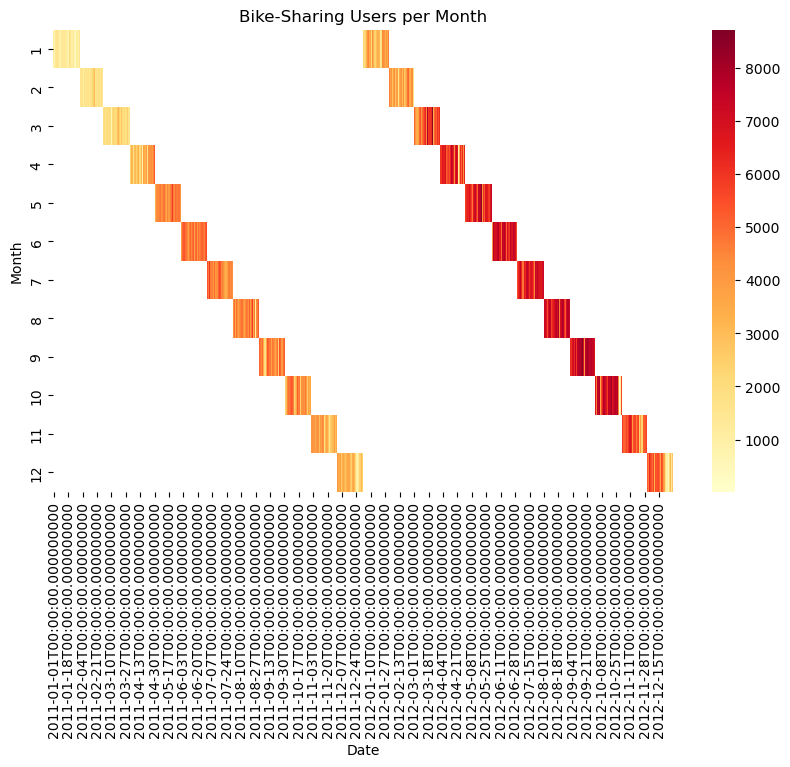

In [111]:
df['month'] = df['dteday'].dt.month
month_users = df.pivot_table(index='month', columns='dteday', values='cnt')
plt.figure(figsize=(10, 6))
sns.heatmap(month_users, cmap='YlOrRd')
plt.xlabel('Date')
plt.ylabel('Month')
plt.title('Bike-Sharing Users per Month')
plt.show()
##this graph could let me to read which month the users count is high this is more abvious. After that here is a ridgline 
#also shows the monthly users, but it could let me to read the change of the users count in the month. They play different roles

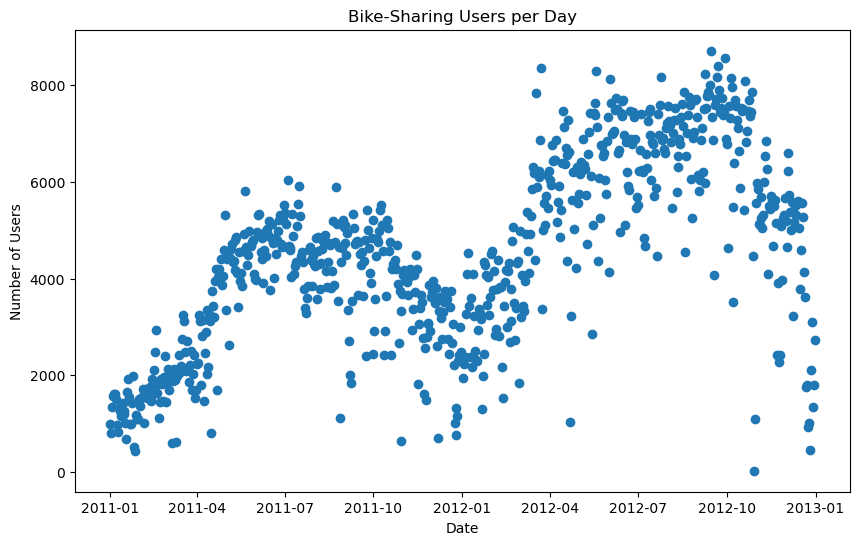

In [114]:
df['date'] = pd.to_datetime(df['dteday'])
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['cnt'])
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Bike-Sharing Users per Day')
plt.show()
##this is the overview of daily count users change by dteday.

In [269]:
year1=df[df["yr"] == 0]
year1
##I divide the df to two as year1 and year2, so everything would follow by the year so the graph
##would not be too crowd, it should look clear.

,dteday,season,yr,mnth,holiday,weekday,workingday,cnt
0,2011-01-01,1,0,1,0,6,0,985
1,2011-01-02,1,0,1,0,0,0,801
2,2011-01-03,1,0,1,0,1,1,1349
3,2011-01-04,1,0,1,0,2,1,1562
4,2011-01-05,1,0,1,0,3,1,1600
...,...,...,...,...,...,...,...,...
360,2011-12-27,1,0,12,0,2,1,1162
361,2011-12-28,1,0,12,0,3,1,2302
362,2011-12-29,1,0,12,0,4,1,2423
363,2011-12-30,1,0,12,0,5,1,2999


In [270]:
year1.to_csv('../data/processed/2011data.csv')  

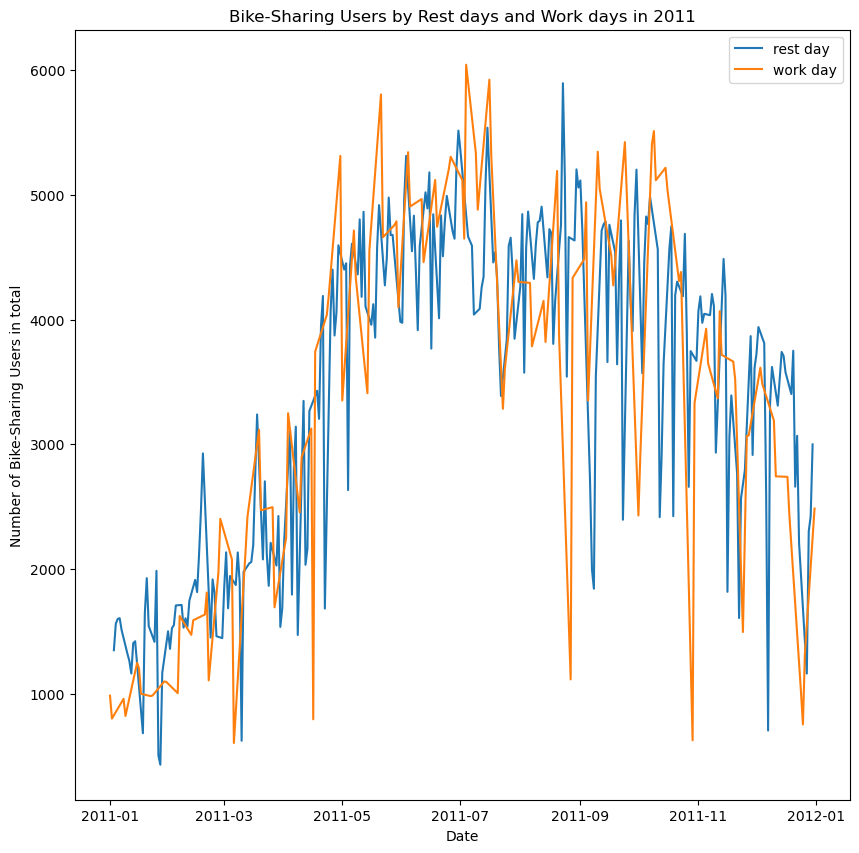

In [277]:
work=year1[year1['workingday']==1]
rest=year1[year1['workingday']==0]
plt.figure(figsize=(10, 10))
plt.plot(work['dteday'], work['cnt'],label='rest day')
plt.plot(rest['dteday'], rest['cnt'],label='work day')
plt.xlabel('Date')
plt.ylabel('Number of Bike-Sharing Users in total')
plt.title('Bike-Sharing Users by Rest days and Work days in 2011')
plt.legend()
plt.show()
##this could show the work days and rest days(includes holiday and weekend) users count change.

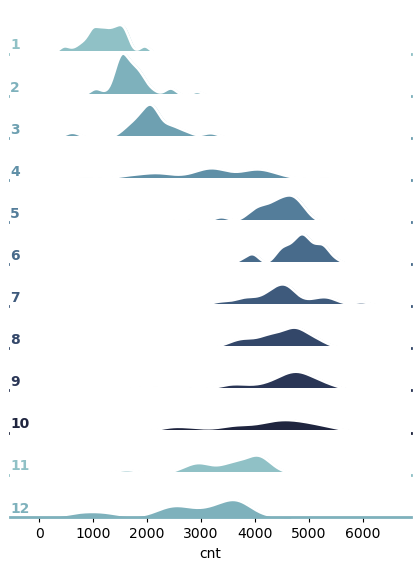

In [242]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(year1, row='mnth',hue='mnth',aspect=10,height=.5,palette=pal)
g.map(sns.kdeplot, 'cnt',bw_adjust=.5,clip_on=False,fill=True,alpha=1,linewidth=1.5)
g.map(sns.kdeplot, 'cnt',clip_on=False,color='w',lw=2,bw_adjust=.5)
g.refline(y=0,linewidth=2,linestyle='-',color=None,clip_on=False)
def label(x,color,label):
    ax = plt.gca()
    ax.text(0, .2,label,fontweight='bold',color=color,
            ha='left',va='center',transform=ax.transAxes)
g.map(label,'cnt')
g.figure.subplots_adjust(hspace=-.05)
g.set_titles('')
g.set(yticks=[],ylabel='')
g.despine(bottom=True,left=True)
##this could see the users number change in month which can observe the trend clearly

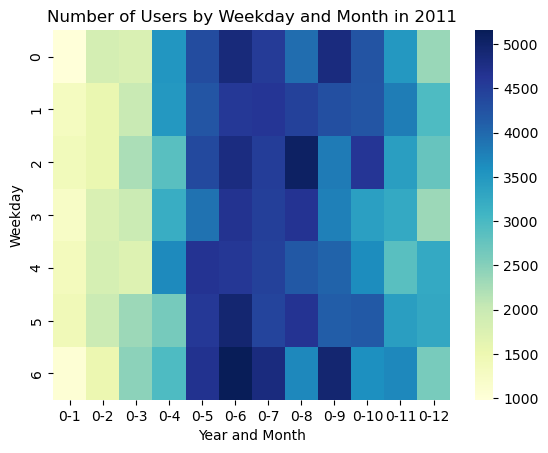

In [273]:
table = pd.pivot_table(year1, values='cnt', index=['weekday'], columns=['yr', 'mnth'], aggfunc='mean')
sns.heatmap(table, cmap='YlGnBu')
plt.title('Number of Users by Weekday and Month in 2011')
plt.xlabel('Year and Month')
plt.ylabel('Weekday')
plt.show()

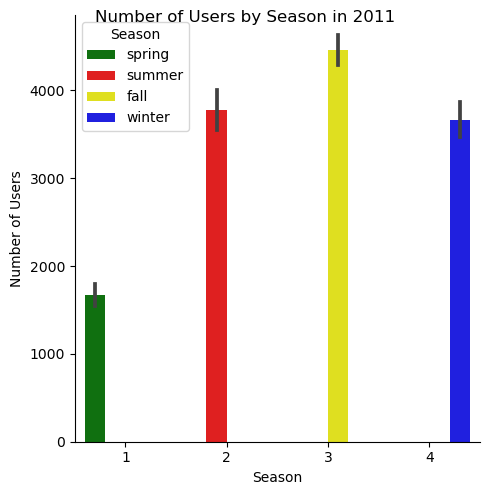

In [274]:
season_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
color_dict = {1: 'green', 2: 'red', 3: 'yellow', 4: 'blue'}
palette = [color_dict[season] for season in season_dict.keys()]
plot = sns.catplot(x="season", y="cnt", hue="season", kind="bar", data=year1, palette=palette)
plot.fig.suptitle('Number of Users by Season in 2011')
plot.set(xlabel='Season', ylabel='Number of Users')
legend = plot.ax.legend(title='Season')
for season, label in season_dict.items():
    legend.get_texts()[season-1].set_text(label)
plt.show()

In [238]:
year2=df[df["yr"]==1]
year2
##the graph of 2012 is the same as above

,dteday,season,yr,mnth,holiday,weekday,workingday,cnt
365,2012-01-01,1,1,1,0,0,0,2294
366,2012-01-02,1,1,1,1,1,0,1951
367,2012-01-03,1,1,1,0,2,1,2236
368,2012-01-04,1,1,1,0,3,1,2368
369,2012-01-05,1,1,1,0,4,1,3272
...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2114
727,2012-12-28,1,1,12,0,5,1,3095
728,2012-12-29,1,1,12,0,6,0,1341
729,2012-12-30,1,1,12,0,0,0,1796


In [246]:
year2.to_csv('../data/processed/2012data.csv') 

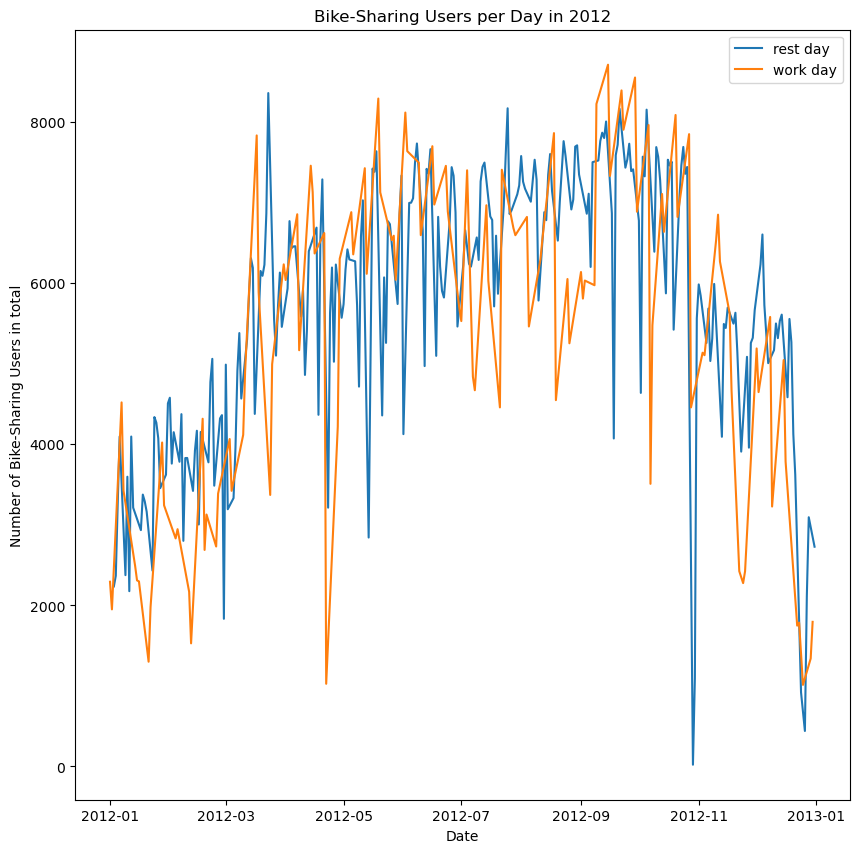

In [275]:
work=year2[year2['workingday']==1]
rest=year2[year2['workingday']==0]
plt.figure(figsize=(10, 10))
plt.plot(work['dteday'], work['cnt'],label='rest day')
plt.plot(rest['dteday'], rest['cnt'],label='work day')
plt.xlabel('Date')
plt.ylabel('Number of Bike-Sharing Users in total')
plt.title('Bike-Sharing Users per Day in 2012')
plt.legend()
plt.show()


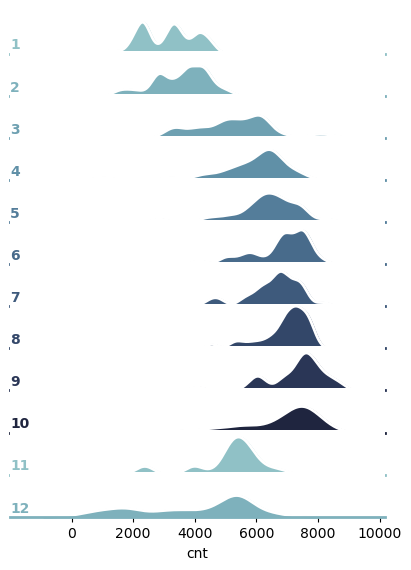

In [241]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(year2, row='mnth',hue='mnth',aspect=10,height=.5,palette=pal)
g.map(sns.kdeplot, 'cnt',bw_adjust=.5,clip_on=False,fill=True,alpha=1,linewidth=1.5)
g.map(sns.kdeplot, 'cnt',clip_on=False,color='w',lw=2,bw_adjust=.5)
g.refline(y=0,linewidth=2,linestyle='-',color=None,clip_on=False)
def label(x,color,label):
    ax = plt.gca()
    ax.text(0, .2,label,fontweight='bold',color=color,
            ha='left',va='center',transform=ax.transAxes)
g.map(label,'cnt')
g.figure.subplots_adjust(hspace=-.05)
g.set_titles('')
g.set(yticks=[],ylabel='')
g.despine(bottom=True,left=True)

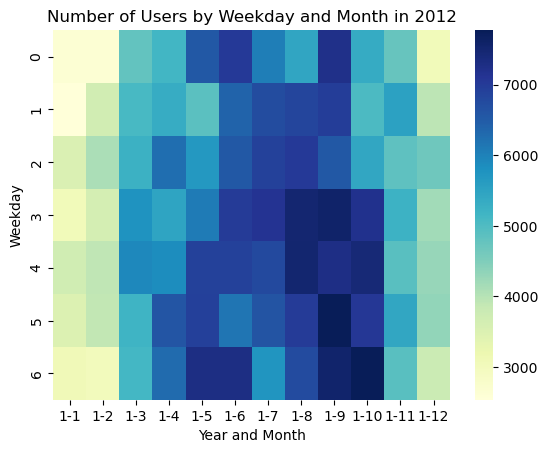

In [276]:
table = pd.pivot_table(year2, values='cnt', index=['weekday'], columns=['yr', 'mnth'], aggfunc='mean')
sns.heatmap(table, cmap='YlGnBu')
plt.title('Number of Users by Weekday and Month in 2012')
plt.xlabel('Year and Month')
plt.ylabel('Weekday')
plt.show()

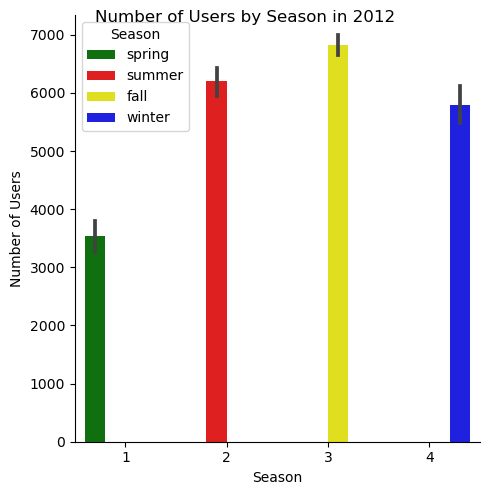

In [266]:
season_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
color_dict = {1: 'green', 2: 'red', 3: 'yellow', 4: 'blue'}
palette = [color_dict[season] for season in season_dict.keys()]
plot = sns.catplot(x="season", y="cnt", hue="season", kind="bar", data=year2, palette=palette)
plot.fig.suptitle('Number of Users by Season in 2012')
plot.set(xlabel='Season', ylabel='Number of Users')
legend = plot.ax.legend(title='Season')
for season, label in season_dict.items():
    legend.get_texts()[season-1].set_text(label)
plt.show()